# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-info"> 
<b>Целью работы является: </b> 
        - рассмотреть основные параметры датасета, провести предобработку
        - изучить насколько быстро продавались квартиры в расмматриваемый период
        - определить какие факторы оказывают влияние на стоимость объекта
        - определить среднюю стоимость одного квадратного метра в 10 пунктах с наибольшим числом объвлений
        - определить влияние расстояния от центра города на итоговую стоимость объекта 

<b>Для достижения цели были поставлены следующие задачи: </b> 
        - рассмотреть основные параметры датасета
        - заполнение пропусков и изменение типов данных
        - поиск и устранение дубликатов, аномальных значений
        - построить графики для визуализации данных
        - определить среднюю стоимость одного квадратного метра в 10 пунктах с наибольшим числом объвлений
        - определить влияние расстояния от центра города на итоговую стоимость объекта </div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


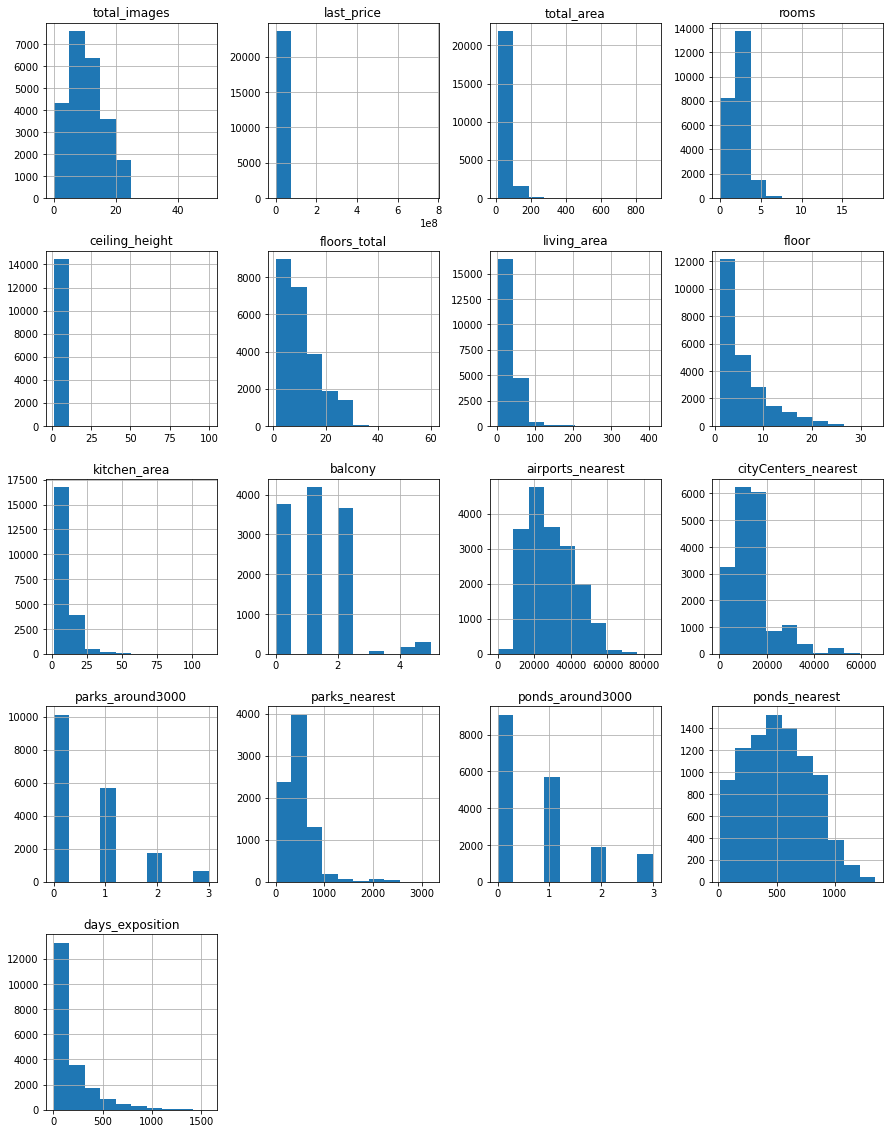

In [5]:
data.hist(figsize=(15,20))
plt.show()

### Предобработка данных

Пропуски обнаружены в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest, ponds_around3000, days_exposition.

In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропуски в данных о высоте потолков заполним медианным значением. Также в данных присутствуют аномальные значение высоты, вероятно вызванные неправильным вводом дробного числа.

In [8]:
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)
data[data['ceiling_height'] > 5]['ceiling_height'].unique()

array([ 25. ,   5.2,   5.3,   5.6,  32. ,   8. ,  27. ,  24. ,  26. ,
         8.3,   5.5,  14. ,  20. ,   6. ,  22.6,   5.8,  27.5,  10.3,
       100. ])

In [9]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>15 else x)
data[data['ceiling_height'] > 5]['ceiling_height'].unique()

array([ 5.2,  5.3,  5.6,  8. ,  8.3,  5.5, 14. ,  6. ,  5.8, 10.3, 10. ])

Изменение типов данных : заменим тип данных столбцов floors total, balcony, parks_around3000 на Int64.

In [10]:
data = data.astype({'floors_total' : 'Int64', 'parks_around3000' : 'Int64', 'days_exposition' : 'Int64', 'ponds_around3000' :'Int64' }, errors='ignore')

<div class="alert alert-info"> <b>Изменим типы данных на int у столбцов :</b> balcony, ponds_nearest ,parks_nearest,airports_nearest, cityCenters_nearest.</div>

In [11]:
data = data.astype({'balcony' : 'Int64', 'ponds_nearest' : 'Int64','parks_nearest' : 'Int64','airports_nearest' : 'Int64'}, errors='ignore')

Заполним пропуски значений столбца is_apartment значениями False из предположения, что .

In [12]:
data['is_apartment'].fillna(False,inplace=True)

Пропуски столбца с данными о количестве балконов заполним значением 0, как отсутсвие балкона.

In [13]:
data['balcony'].fillna(0,inplace=True)

Рассмотрим столбец locality_name, с данными о расположении объекта недвижимости.

In [14]:
data['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
деревня Снегирёвка                  1
поселок Коробицыно                  1
коттеджный поселок Счастье          1
городской посёлок Свирьстрой        1
поселок Севастьяново                1
Name: locality_name, Length: 364, dtype: int64

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Просмотрев список уникальных значений столбца locality_name, обнаружены неявные дубликаты. В основном из-за отсутсвия или наличия слова определяющего тип населенного пункта, буква "е" вместо "ё".

In [16]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'] = data['locality_name'].str.replace('ё','е') #.str.lower()

locality_type = ['поселок при железнодорожной станции','садоводческое некоммерческое товарищество','городской поселок',
'поселок городского типа', 'деревня', 'коттеджный поселок', 'поселок', 'садовое товарищество',
'поселок станции','село','станции'] 

for location in locality_type:
    data['locality_name'] = data['locality_name'].str.replace(location, '').str.strip()

data['locality_name']

0        Санкт-Петербург
1                 Шушары
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23645    Санкт-Петербург
23646              Тосно
23647        Рождествено
23648    Санкт-Петербург
23649        Новый Учхоз
Name: locality_name, Length: 23650, dtype: object

Переведем формат данных столбца first_day_exposition к формату день.месяц.год.

In [17]:
data['first_day_exposition'] =pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23645   2017-03-21
23646   2018-01-15
23647   2018-02-11
23648   2017-03-28
23649   2017-07-21
Name: first_day_exposition, Length: 23650, dtype: datetime64[ns]

<div class="alert alert-info"> Проверка на явные дубликаты.</div>

In [18]:
data.duplicated().sum()

0

<div class="alert alert-info"> Явных дубликатов не обнаружено.</div>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в датасет данные о стоимости за квадратный метр.

In [20]:
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].round(0).astype(int)
display(data['price_per_m2'])

0        120370
1         82921
2         92786
3        408176
4        100000
          ...  
23645     72491
23646     52542
23647     44092
23648    149511
23649     41796
Name: price_per_m2, Length: 23650, dtype: int64

Добавим в датасет столбцы с данными: день, месяц и год публикации объявления

In [21]:
data['days'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [22]:
data.loc[:,'days':'year']

,days,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
...,...,...,...
23645,1,3,2017
23646,0,1,2018
23647,6,2,2018
23648,1,3,2017


Добавим в датасет столбец с категориями кваритир по этажам. 

In [23]:
def add_floor_category(x):
    try:
        if x['floor'] == 1:
            return 'первый'
        elif x['floor'] == x['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'другой'

data['floor_category'] = data.apply(add_floor_category,axis=1)

In [24]:
data['floor_category'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_category, dtype: int64

Добавим столбец с значениями расстояния объекта недвижимости в км до центра города.

In [25]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'].apply(lambda x: x/1000)

In [26]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23645     4.0
23646     NaN
23647     NaN
23648    10.0
23649     NaN
Name: cityCenters_nearest_km, Length: 23650, dtype: float64

### Проведите исследовательский анализ данных

Text(0, 0.5, 'Кол-во квартир')

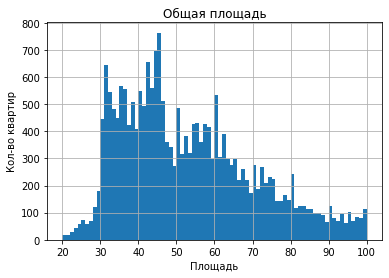

In [27]:
plot = data['total_area'].plot(kind='hist', bins=80, range=(20,100), title='Общая площадь', xlabel='Площадь', ylabel='Кол-во квартир',grid=True)
plot.set_xlabel('Площадь')
plot.set_ylabel('Кол-во квартир')

In [28]:
print(f'Средняя площадь квартиры: {data.total_area.mean()}')
print(f'Медиана : {data.total_area.median()}')

Средняя площадь квартиры: 60.32906934460889
Медиана : 52.0


Наибольшее количество квартир с площадью примерно 45 кв.м. Пики в количестве объявлений наблюдаются у квартир площадью 32 кв.м и 60 кв.м.

Text(0, 0.5, 'Кол-во квартир')

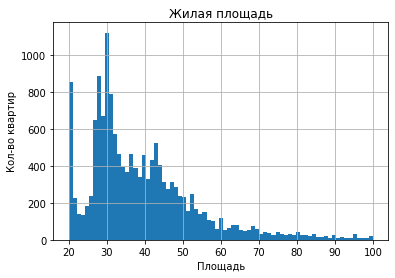

In [29]:
plot = data['living_area'].plot(kind='hist', bins=75, range=(20,100), title='Жилая площадь', grid=True)
plot.set_xlabel('Площадь')
plot.set_ylabel('Кол-во квартир')

In [30]:
print(f'Средняя жил. площадь : {data.living_area.mean()}')
print(f'Медиана : {data.living_area.median()}')

Средняя жил. площадь : 34.44835562302317
Медиана : 30.0


Text(0, 0.5, 'Кол-во квартир')

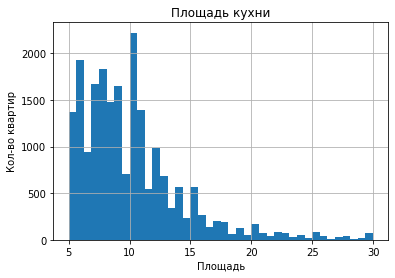

In [31]:
plot = data['kitchen_area'].plot(kind='hist', bins=40, range=(5,30), title='Площадь кухни', grid=True)
plot.set_xlabel('Площадь')
plot.set_ylabel('Кол-во квартир')

In [32]:
print(f'Средняя площадь кухни: {data.kitchen_area.mean()}')
print(f'Медиана : {data.kitchen_area.median()}')

Средняя площадь кухни: 10.566402881062626
Медиана : 9.1


Самая часто встречаемая жилая площадь порядка 30 кв.м, а кухни порядка 10 кв.м.

Text(0, 0.5, 'Кол-во')

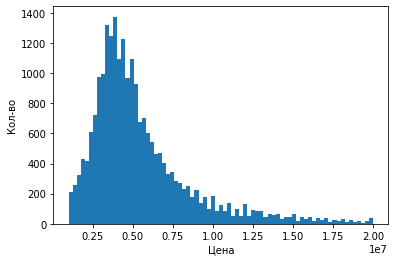

In [33]:
plot = data['last_price'].plot(kind='hist',bins=75,range=(1000000,20000000))
plot.set_xlabel('Цена')
plot.set_ylabel('Кол-во')

В объявлениях больше всего квартир стоимостью порядка 4 млн. руб.

Text(0, 0.5, 'Кол-во')

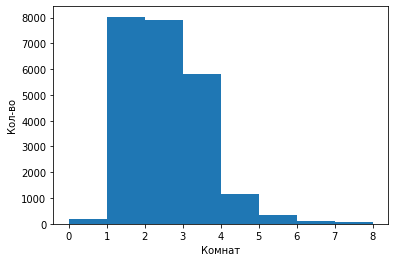

In [34]:
plot = data['rooms'].plot(kind='hist',bins=8,range=(0,8))
plot.set_xlabel('Комнат')
plot.set_ylabel('Кол-во')

Больше всего 1 и 2ух комнатных квартир.

Text(0, 0.5, 'Кол-во квартир')

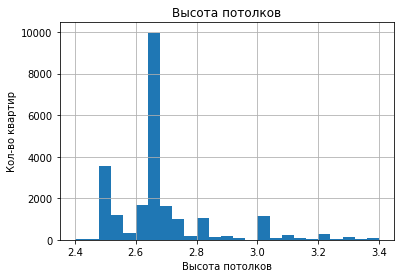

In [35]:
plot = data['ceiling_height'].plot(kind='hist',bins=25, range=(2.4,3.4), title='Высота потолков', grid=True)
plot.set_xlabel('Высота потолков')
plot.set_ylabel('Кол-во квартир')

In [36]:
print(f'Среднее значение : {data.ceiling_height.mean()}')
print(f'Медиана : {data.ceiling_height.median()}')

Среднее значение : 2.698619873150106
Медиана : 2.65


Text(0, 0.5, 'Кол-во квартир')

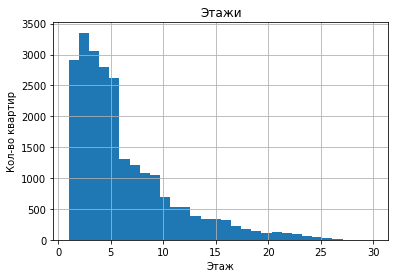

In [37]:
plot = data['floor'].plot(kind='hist',bins=30, range=(1,30), title='Этажи', grid=True)
plot.set_xlabel('Этаж')
plot.set_ylabel('Кол-во квартир')

In [38]:
print(f'Средняя значение этажа: {data.floor.mean()}')
print(f'Медиана : {data.floor.median()}')

Средняя значение этажа: 5.893276955602537
Медиана : 4.0


Text(0, 0.5, 'Кол-во')

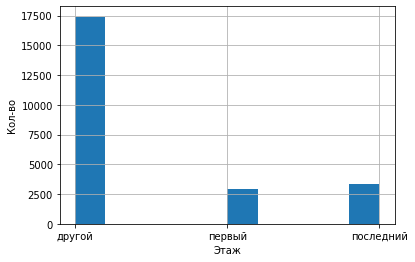

In [39]:
plot = data['floor_category'].hist()
plot.set_xlabel('Этаж')
plot.set_ylabel('Кол-во')

Меньше всего объявлений с квартирами на первых этажах.

Text(0, 0.5, 'Кол-во квартир')

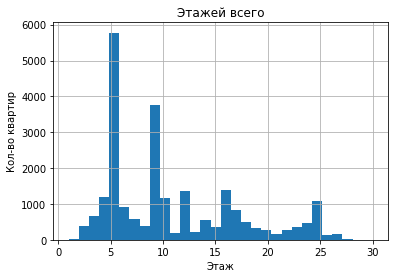

In [40]:
plot = data['floors_total'].plot(kind='hist',bins=30, range=(1,30), title='Этажей всего', grid=True)
plot.set_xlabel('Этаж')
plot.set_ylabel('Кол-во квартир')

Чаще всего встречаются 5ти этажные дома. Достаточно большое количество 9ти этажных домов.

Text(0, 0.5, 'Кол-во')

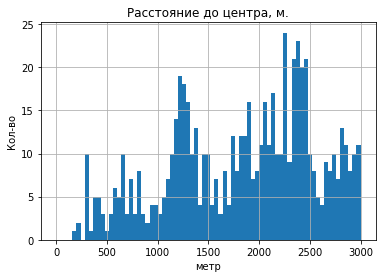

In [41]:
plot = data['cityCenters_nearest'].plot(kind='hist', bins=75, range=(1,3000), title='Расстояние до центра, м.', grid=True)
plot.set_xlabel('метр')
plot.set_ylabel('Кол-во')

In [42]:
print(f'Средняя значение расстояния до центра, м: {data.cityCenters_nearest.mean()}')
print(f'Медиана, м : {data.cityCenters_nearest.median()}')

Средняя значение расстояния до центра, м: 14197.860742047522
Медиана, м : 13105.0


Text(0, 0.5, 'Кол-во')

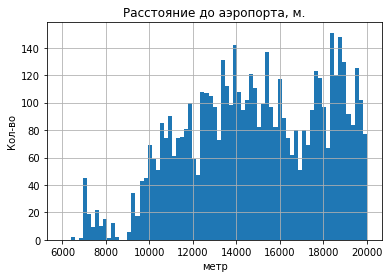

In [43]:
plot = data['airports_nearest'].plot(kind='hist', bins=75, range=(6000,20000), title='Расстояние до аэропорта, м.', grid=True)
plot.set_xlabel('метр')
plot.set_ylabel('Кол-во')

Text(0, 0.5, 'Кол-во')

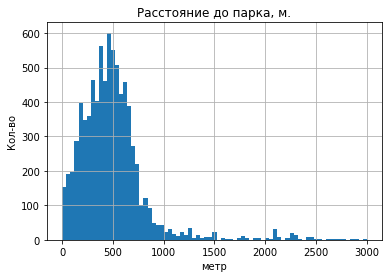

In [44]:
plot = data['parks_nearest'].plot(kind='hist', bins=75, range=(1,3000), title='Расстояние до парка, м.', grid=True)
plot.set_xlabel('метр')
plot.set_ylabel('Кол-во')

Text(0, 0.5, 'Кол-во')

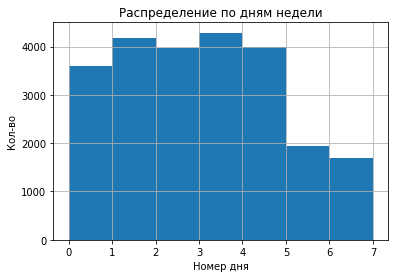

In [45]:
plot = data['days'].plot(kind='hist',bins=7, range=(0,7), title='Распределение по дням недели', grid=True)
plot.set_xlabel('Номер дня')
plot.set_ylabel('Кол-во')

В будние дни публицуется больше объявлений, чем в выходные. 

Text(0, 0.5, 'Кол-во')

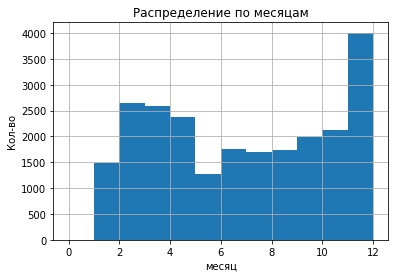

In [46]:
plot = data['month'].plot(kind='hist', bins=12, range=(0,12), title='Распределение по месяцам', grid=True)
plot.set_xlabel('месяц')
plot.set_ylabel('Кол-во')

Больше всего объявлений публикуется в декабре, практически нет значений в январе.

Text(0, 0.5, 'Кол-во')

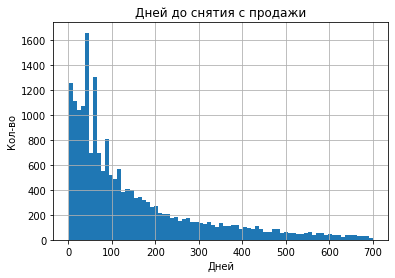

In [47]:
plot = data['days_exposition'].plot(kind='hist', bins=75, range=(1,700), title='Дней до снятия с продажи', grid=True)
plot.set_xlabel('Дней')
plot.set_ylabel('Кол-во')

Text(0, 0.5, 'Кол-во')

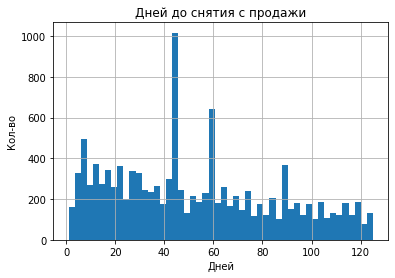

In [48]:
plot = data['days_exposition'].plot(kind='hist', bins=50, range=(1,125), title='Дней до снятия с продажи', grid=True)
plot.set_xlabel('Дней')
plot.set_ylabel('Кол-во')

In [49]:
#print(f'Средняя кол-во дней до снятия с продажи: {data.days_exposition.mean()}')
#print(f'Медиана : {data.days_exposition.median()}')
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:** Чаще всего квартиры продаются за 45 или 60 дней. Более половины квартир продаются в первые 100 дней после появления объявления. Долгими можно считать объявления, которые "висят" более 230 дней. 

**Задание:** "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

In [50]:
corr_data = data[['last_price','total_area', 'living_area', 'kitchen_area','rooms','floor_category','days','month','year']].corr() #floor_category
corr_data['last_price']

last_price      1.000000
total_area      0.653743
living_area     0.566517
kitchen_area    0.520233
rooms           0.363421
days            0.001607
month           0.002741
year           -0.042927
Name: last_price, dtype: float64

In [51]:
pivot_data = data.pivot_table(index='locality_name',values=['last_price','total_area', 'living_area', 'kitchen_area','rooms','floor_category','days','month','year'],aggfunc='mean')
#pd.plotting.scatter_matrix(pivot_data, figsize=(15, 15))
#plt.show()

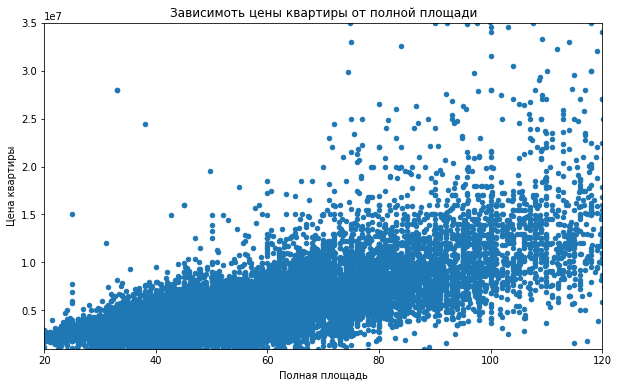

In [52]:
data.plot(kind='scatter',x='total_area', y='last_price',xlabel='Полная площадь',ylabel='Цена квартиры',title='Зависимоть цены квартиры от полной площади',figsize=(10,6),xlim=(20,120), ylim=(1000000,35000000))
plt.show()

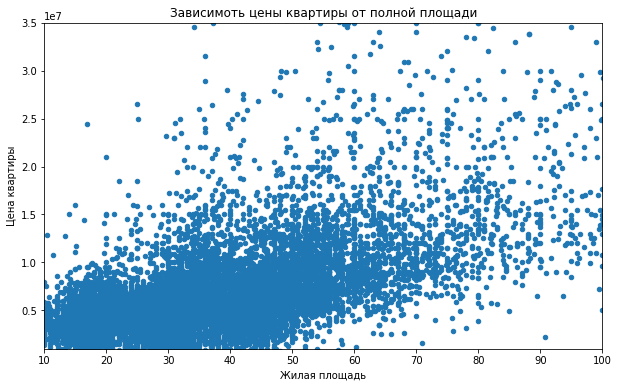

In [53]:
data.plot(kind='scatter',x='living_area', y='last_price',xlabel='Жилая площадь',ylabel='Цена квартиры',title='Зависимоть цены квартиры от полной площади',figsize=(10,6),xlim=(10,100), ylim=(1000000,35000000))
plt.show()

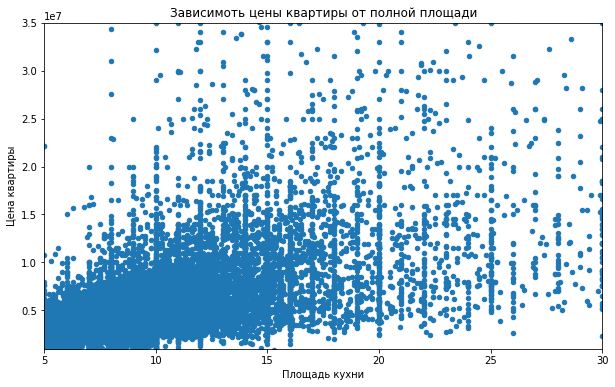

In [54]:
data.plot(kind='scatter',x='kitchen_area', y='last_price',xlabel='Площадь кухни',ylabel='Цена квартиры',title='Зависимоть цены квартиры от полной площади',figsize=(10,6),xlim=(5,30), ylim=(1000000,35000000))
plt.show()

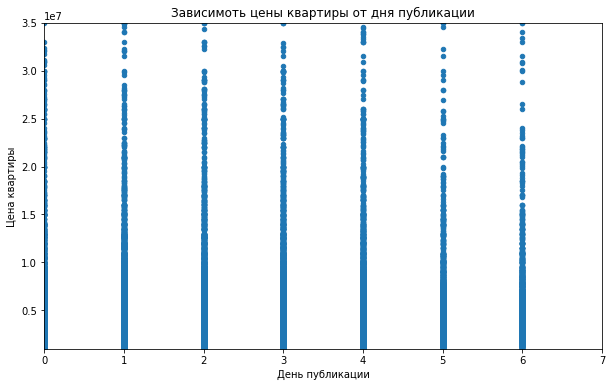

In [55]:
data.plot(kind='scatter',x='days', y='last_price',xlabel='День публикации',ylabel='Цена квартиры',title='Зависимоть цены квартиры от дня публикации',figsize=(10,6),xlim=(0,7), ylim=(1000000,35000000))
plt.show()

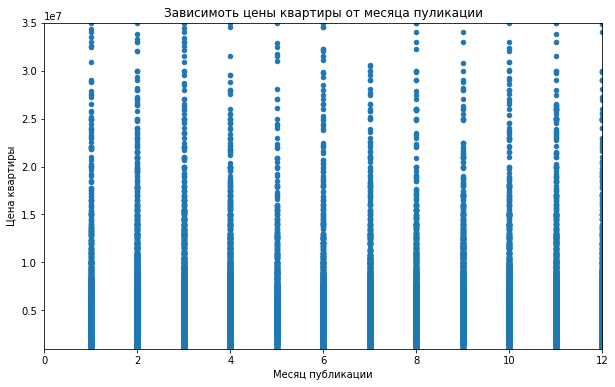

In [56]:
data.plot(kind='scatter',x='month', y='last_price',xlabel='Месяц публикации',ylabel='Цена квартиры',title='Зависимоть цены квартиры от месяца пуликации',figsize=(10,6),xlim=(0,12), ylim=(1000000,35000000))
plt.show()

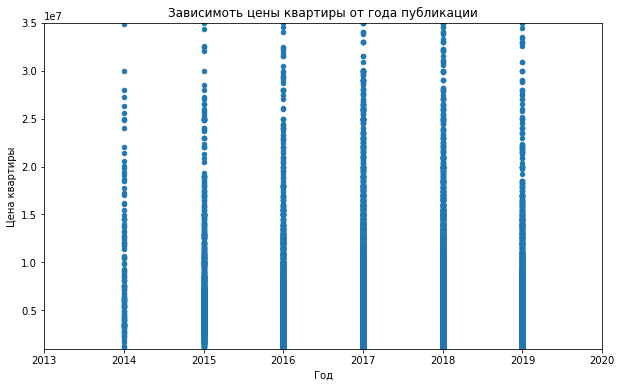

In [57]:
data.plot(kind='scatter',x='year', y='last_price',xlabel='Год',ylabel='Цена квартиры',title='Зависимоть цены квартиры от года публикации',figsize=(10,6),xlim=(2013,2020), ylim=(1000000,35000000))
plt.show()

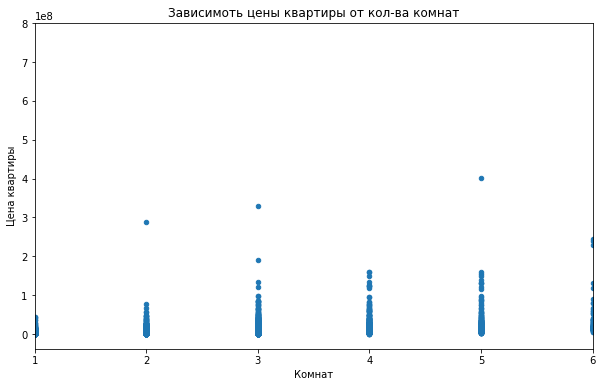

In [58]:
data.plot(kind='scatter',x='rooms', y='last_price',xlabel='Комнат',ylabel='Цена квартиры',title='Зависимоть цены квартиры от кол-ва комнат',figsize=(10,6),xticks=range(1,7),xlim=(1,6))
plt.show()

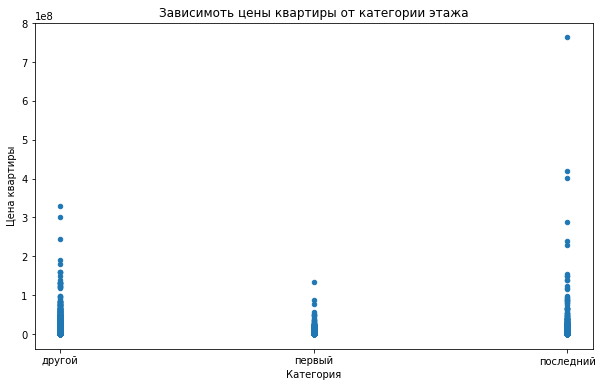

In [59]:
data.plot(kind='scatter',x='floor_category', y='last_price',xlabel='Категория',ylabel='Цена квартиры',title='Зависимоть цены квартиры от категории этажа',figsize=(10,6))
plt.show()

In [60]:
pivot_floor = data.pivot_table(index='floor_category',values='last_price',aggfunc=('mean','median'))
pivot_floor.rename(columns={'mean': 'Среднняя цена','median':'Медианная цена'})

,Среднняя цена,Медианная цена
floor_category,,
другой,6.675825e+06,4850000.0
первый,4.800465e+06,3900000.0
последний,7.359138e+06,4300000.0


**Вывод:**  Наибольшее влияние на стоимость оказывает площадь квартиры. Далее идут жилая площадь, площадь кухни и количество комнат. День и месяц публикации практически не оказывают влияния на стоимость. Цена квартир на первых этажах ниже, чем у квартир на других этажах. Квартиры на последних этажах также менее предпочтительны, вследствие чего их цена меньше, чем у квартир на других этажах.

<div class="alert alert-info"> Цена квартир на первых этажах ниже, чем у квартир на других этажах. Квартиры на последних этажах также менее предпочтительны, вследствие чего их цена меньше, чем у квартир на других этажах.</div>

**Задание:** "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [61]:
pivot_1 = data.pivot_table(index='locality_name', values=['price_per_m2'], aggfunc={'price_per_m2' : 'mean', 'locality_name' : 'count'})
pivot_1.rename(columns={'locality_name':'Кол-во','price_per_m2':'Средняя цена за кв.м'},inplace=True)
pivot_1.sort_values(by='Кол-во',ascending=False).head(10)

,Кол-во,Средняя цена за кв.м
locality_name,,
Санкт-Петербург,15721,114849.005788
Мурино,590,86087.508475
Кудрово,472,95324.957627
Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
Парголово,327,90175.886850
Гатчина,307,68746.110749


In [62]:
pivot_1.loc[pivot_1['Средняя цена за кв.м'] == pivot_1['Средняя цена за кв.м'].max(),'Средняя цена за кв.м']

locality_name
Зеленогорск    115122.75
Name: Средняя цена за кв.м, dtype: float64

In [63]:
pivot_1.loc[pivot_1['Средняя цена за кв.м'] == pivot_1['Средняя цена за кв.м'].min(),'Средняя цена за кв.м']

locality_name
Старополье    11206.333333
Name: Средняя цена за кв.м, dtype: float64

**Вывод:** Выведены данные о средней стоимости за квадратный метр в 10 населенных пунктах с наибольшим количеством объявлений. Максимальная стоимость квадратного метра в Зеленогорск, минимальная в Старополье.

**Задание:** "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [64]:
pivot_2 = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',values=['price_per_m2','last_price'])
pivot_2.rename(columns={'price_per_m2':'Средняя цена за кв.м','last_price':'Средняя цена квартиры'},inplace=True)
pivot_2.head(10)

,Средняя цена квартиры,Средняя цена за кв.м
cityCenters_nearest_km,,
0.0,3.144912e+07,245833.518519
1.0,2.120672e+07,177005.395833
2.0,1.778832e+07,157848.983871
3.0,1.112658e+07,121387.442857
4.0,1.330428e+07,133282.873547
5.0,1.449912e+07,140509.786957
6.0,1.533842e+07,151012.189320
7.0,1.477515e+07,156176.866667
8.0,9.957717e+06,125671.440536


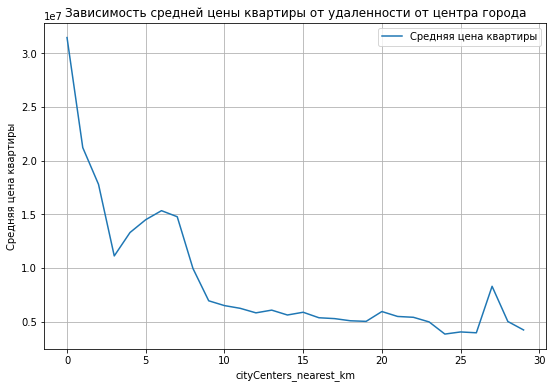

In [65]:
pivot_2.plot(y='Средняя цена квартиры',grid=True,figsize=(9,6),ylabel='Средняя цена квартиры', title = 'Зависимость средней цены квартиры от удаленности от центра города')
plt.show()

**Вывод:** Стоимость квартир в Санкт-Петербурге по удалению от цетра города падает.

### Общий вывод

Проведена работа с данными о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Выполнена предобработка данных(заполнение пропусков, удаление неявных дубликатов и аномальных значений). Расмотрены и изучены данные датасета.

Наибольшее количество квартир с площадью примерно 45 кв.м. Пики в количестве объявлений наблюдаются у квартир площадью 32 кв.м и 60 кв.м. Самая часто встречаемая жилая площадь порядка 30 кв.м, а кухни порядка 10 кв.м. 

В объявлениях больше всего квартир стоимостью порядка 4 млн. руб. Меньше всего объявлений с квартирами на первых этажах. 

В будние дни публицуется больше объявлений, чем в выходные. Больше всего объявлений публикуется в декабре, практически нет объявлений в январе.

Чаще всего квартиры продаются за 45 или 60 дней, при этом более половины квартир продаются в первые 100 дней после появления объявления. Менее удачными можно считать объявления, которые продавались более 230 дней.

Наибольшее влияние на стоимость оказывает площадь квартиры. Далее идут жилая площадь, площадь кухни и количество комнат. День и месяц публикации практически не оказывают влияния на стоимость.

Максимальная стоимость квадратного метра в Зеленогорск, минимальная в Старополье.

Стоимость квартир в города Санкт-Петербург падает по удалению от цетра города.



<div class="alert alert-info"> Цена квартир на первых этажах ниже, чем у квартир на других этажах. Квартиры на последних этажах также менее предпочтительны, вследствие чего их цена меньше, чем у квартир на других этажах.</div>